# U.S. Medical Insurance Costs

### Introduction
The aim of this project is to analyze an insurance dataset provided by Codecademy. The scope of the project and the analysis methods are of my own choice, therefore I've documented my work further below.

### Task 1. Looking over my dataset. Scoping the project.

Firstly, I'm inspecting the given dataset *insurance.csv*. The file includes comma-separated dataset with 7 different fields: age, sex, bmi, children, smoker, region, charges. There are 1339 lines (or rows), including the header. It looks like the dataset is clean and quite ready for being analysed, although it might need changing some binary strings into ints (for example male/female into 0/1). There are multiple ways to analyse this dataset, but within this project, I will focus on the following:

* How many of the subjects are smokers and which gender they are?
* Do the smokers tend to live in a certain region?
* Does living in a certain region affect having children?
* How much is insurance charge influenced by children, bmi, being a smoker and age?

These will be the questions I will try to answer on the course of this project.

In [33]:
import csv
import matplotlib.pyplot as plt

with open('insurance.csv') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)

    count_all = 0
    total_age = 0
    rows = 0
    males = 0
    females = 0
    total_bmi = 0
    for row in insurance_dict:
     count_all += 1
     
     age = int(row['age'])
     total_age += age
     
     bmi = float(row['bmi'])
     total_bmi += bmi
     
     rows += 1
     if row['sex'] == 'female':
          females += 1
     else: males += 1 

    average_age = round(total_age/rows,None) 
    average_bmi = round(total_bmi/rows,1)
    print('There are ' + str(count_all) + ' people in the list. '+ str(females) + ' of them females and ' + str(males) + ' of them males.')
    print('The average age is ' + str(average_age) + '.')
    print('The average bmi is ' + str(average_bmi) + '.')


There are 1338 people in the list. 662 of them females and 676 of them males.
The average age is 39.
The average bmi is 30.7.


### Task 2.1. How many of the subjects are smokers and which sex they are?

In [34]:
def tuples_list(insurance_dict,key1,key2):
        returned = []
        for row in insurance_dict:
            val1 = row[key1]
            val2 = row[key2]
            returned.append((val1,val2))
        return returned

with open('insurance.csv') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)
    
    smoker_sex = tuples_list(insurance_dict,'smoker','sex')

smokers_sex = []
smokers_count = 0
for person in smoker_sex:
     if person[0] == 'yes':
        smokers_sex.append(person[1])
        smokers_count += 1

smokers_percent = round(float(smokers_count/count_all * 100),1)
#print(smokers_sex)
print('There are ' + str(smokers_count) + ' smokers, which is ' + str(smokers_percent) + ' percent of all people in the list.')

There are 274 smokers, which is 20.5 percent of all people in the list.


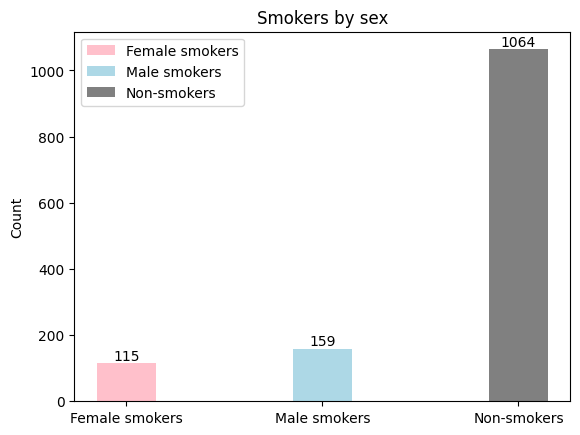

In summary: 
There are 1338 people in the insurance list.
There are 274 smokers, which is 20.5 percent of all people in the list.
There are 1064 non-smokers.
There are 115 female smokers and 159 male smokers.


In [35]:
female_smokers = 0
male_smokers = 0
non_smokers = count_all - smokers_count

for sex in smokers_sex:
    if sex == 'female':
        female_smokers += 1
    else:
        male_smokers += 1
#print(female_smokers,male_smokers)

x_labels = ['Female smokers','Male smokers','Non-smokers']
x_positions = range(len(x_labels))

plt.bar(x_positions[0],female_smokers, width=0.30, label='Female smokers', color='pink')
plt.bar(x_positions[1], male_smokers, width=0.30, label='Male smokers', color='lightblue')
plt.bar(x_positions[2],non_smokers,width=0.30, label='Non-smokers', color='grey')

plt.ylabel('Count')
plt.title('Smokers by sex')
plt.xticks(x_positions, x_labels)

# Add numbers on top of the columns
plt.text(x_positions[0], female_smokers, str(female_smokers), ha='center', va='bottom', fontsize=10)
plt.text(x_positions[1], male_smokers, str(male_smokers), ha='center', va='bottom', fontsize=10)
plt.text(x_positions[2], non_smokers, str(non_smokers), ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()

print('In summary: \nThere are ' + str(count_all) + ' people in the insurance list.\nThere are ' + str(smokers_count) + ' smokers, which is ' + str(smokers_percent) + ' percent of all people in the list.\nThere are ' 
      + str(non_smokers) + ' non-smokers.\nThere are ' + str(female_smokers) + ' female smokers and ' + str(male_smokers) + ' male smokers.')

### Task 2.2. Do smokers tend to live in a certain region?

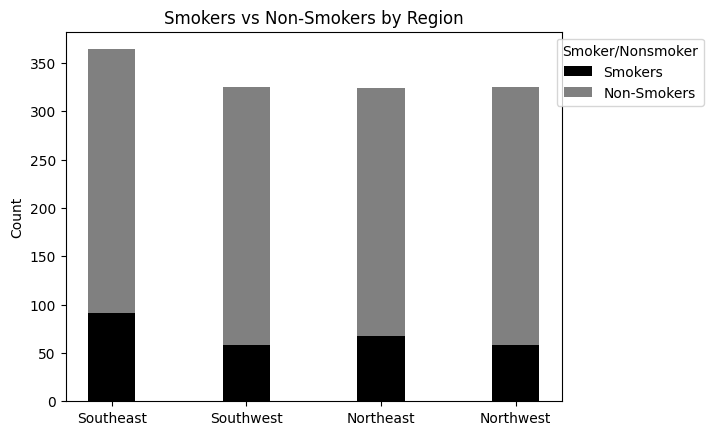

In [36]:
with open('insurance.csv') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)

    smoker_region = tuples_list(insurance_dict,'smoker','region')
    #print(smoker_region)

southeast_smokers = 0
southeast_nonsmokers = 0

southwest_smokers = 0
southwest_nonsmokers = 0

northeast_smokers = 0
northeast_nonsmokers = 0

northwest_smokers = 0
northwest_nonsmokers = 0

for person in smoker_region:
    if person[1] == 'southeast':
        if person[0] == 'yes':
            southeast_smokers += 1
        else: southeast_nonsmokers += 1
    elif person[1] == 'southwest':
        if person[0] == 'yes':
            southwest_smokers += 1
        else: southwest_nonsmokers += 1
    elif person[1] == 'northeast':
        if person[0] == 'yes':
            northeast_smokers += 1
        else: northeast_nonsmokers += 1
    else:
        if person[0] == 'yes':
            northwest_smokers += 1
        else: northwest_nonsmokers += 1

regions = ['Southeast', 'Southwest', 'Northeast', 'Northwest']
x_positions = range(len(regions))

# Width of the columns
bar_width = 0.35

# Create the bar plot for Southeast region
plt.bar(x_positions, [southeast_smokers, southwest_smokers, northeast_smokers, northwest_smokers],
        width=bar_width, label='Smokers', color='black')

# Create the bar plot for Southeast region, shifting the bars to the right
plt.bar(x_positions, [southeast_nonsmokers, southwest_nonsmokers, northeast_nonsmokers, northwest_nonsmokers],
        width=bar_width, bottom=[southeast_smokers, southwest_smokers, northeast_smokers, northwest_smokers],
        label='Non-Smokers', color='gray')

plt.ylabel('Count')
plt.title('Smokers vs Non-Smokers by Region')
plt.xticks(x_positions, regions)  # Set the x-axis labels to the regions
plt.legend(title='Smoker/Nonsmoker', loc='upper right', bbox_to_anchor=(1.3, 1))


plt.show()


In [37]:
def smokers_percent(region_smokers,region_nonsmokers,region):
    total_smokers=region_smokers+region_nonsmokers
    percent = round(region_smokers*100/total_smokers,1)
    return print(str(percent) + ' percent of residents are smokers in the '+ region + ' region.')

northeast_percent = smokers_percent(northeast_smokers,northeast_nonsmokers,'northeast')
northwest_percent = smokers_percent(northwest_smokers,northwest_nonsmokers,'northwest')
southeast_percent = smokers_percent(southeast_smokers,southeast_nonsmokers,'southeast')
southwest_percent = smokers_percent(southwest_smokers,southwest_nonsmokers,'southwest')
    

20.7 percent of residents are smokers in the northeast region.
17.8 percent of residents are smokers in the northwest region.
25.0 percent of residents are smokers in the southeast region.
17.8 percent of residents are smokers in the southwest region.


### Task 2.3. Does living in a certain region affect having children?

In [38]:
with open('insurance.csv') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)

    region_children = tuples_list(insurance_dict,'region','children')
    #print(region_children)

northeast_no_children = 0
northeast_count = 0

northwest_no_children = 0
northwest_count = 0

southeast_no_children = 0
southeast_count = 0

southwest_no_children = 0
southwest_count = 0

for person in region_children:
    if person[0] == 'northeast':
        northeast_count += 1
        if person[1] == '0':
            northeast_no_children += 1
    elif person[0] == 'northwest':
        northwest_count += 1
        if person[1] == '0':
            northwest_no_children += 1
    elif person[0] == 'southeast':
        southeast_count += 1
        if person[1] == '0':
            southeast_no_children += 1
    else:
        southwest_count += 1
        if person[1] =='0':
            southwest_no_children += 1

def smokers_percent(region_count,region_no_children,region):
    percent = round(region_no_children*100/region_count,1)
    return print(str(percent) + ' percent of residents have 1 or more children in the '+ region + ' region.')

northeast_percent = smokers_percent(northeast_count,northeast_no_children,'northeast')
northwest_percent = smokers_percent(northwest_count,northwest_no_children,'northwest')
southeast_percent = smokers_percent(southeast_count,southeast_no_children,'southeast')
southwest_percent = smokers_percent(southwest_count,southwest_no_children,'southwest')

45.4 percent of residents have 1 or more children in the northeast region.
40.6 percent of residents have 1 or more children in the northwest region.
43.1 percent of residents have 1 or more children in the southeast region.
42.5 percent of residents have 1 or more children in the southwest region.


### Task 2.4. How much is insurance charge influenced by children, bmi, being a smoker and age?

How is insurance charge infulenced by all of these separate factors? Even though I couldn't construct an ideal analysis, I could tackle this in a way that could give me an indication. At first I need to find at least one person in this dataset, who is not influenced by all of the contributing factors in this dataset. That would be a person who:
* has no children,
* doesn't smoke,
* has a bmi in the range of 18.5-24.9 (normal weight),
* is 18 years of age.

When it comes to age, I have considered age to be a variable that affects insurance costs in a linear fashion. The higher the age number, the more the insurance costs. I will compare the insurance costs for age groups of 18-29, 30-39, 40-49, 50-59, 60-69 and >= 70.
Also for the sake of simplicity, I will leave out sex as a contributor for now.

In [39]:
with open('insurance.csv') as insurance_file:
    reader = csv.DictReader(insurance_file)
    insurance_list = [row for row in reader]

#print(insurance_list)

default_list = []
for person in insurance_list:
    if (person['children'] == '0' and
        person['smoker'] == 'no' and
        18.5 <= float(person['bmi']) <= 24.9 and
        person['age'] == '18'):
        default_list.append(person)

#print(default_list)

total_insurance_cost = 0
for person in default_list:
    insurance_cost = float(person['charges'])
    total_insurance_cost += insurance_cost

default_insurance_cost = round(total_insurance_cost/len(default_list))

print('The default insurance cost is ' + str(default_insurance_cost) + ' dollars.')
    

The default insurance cost is 1591 dollars.
